In [ ]:
# This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.5, stratify=y_train)

In [ ]:
print(len(y_train), len(y_val), len(y_test))

25000 25000 10000


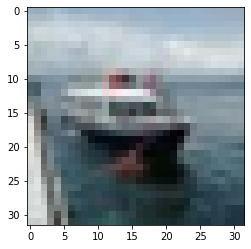

In [ ]:
plt.imshow(x_train[0])
plt.show()

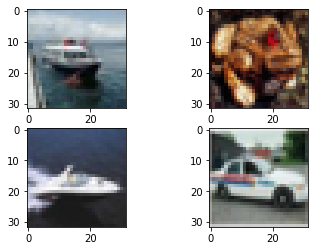

In [ ]:
plt.subplot(221)
plt.imshow(x_train[0])
plt.subplot(222)
plt.imshow(x_train[1])
plt.subplot(223)
plt.imshow(x_train[2])
plt.subplot(224)
plt.imshow(x_train[3])
plt.show()

In [ ]:
# need to specify 32x32 and 3 channels since it's a colored dataset
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_val = x_val.reshape(x_val.shape[0], 32, 32, 3).astype('float32')

In [ ]:
# need to normalize values 
x_train = x_train / 255
x_test = x_test / 255
x_val = x_val / 255

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print(num_classes)

10


In [ ]:
def baseline_model():
  model = Sequential()
  model.add(Conv2D(68, (3, 3), input_shape=(32, 32, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(68, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(120, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(700, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(540, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model = baseline_model()

In [39]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=260)

Epoch 1/100
97/97 [==============================] - 78s 802ms/step - loss: 0.1121 - accuracy: 0.9627 - val_loss: 1.2648 - val_accuracy: 0.7402
Epoch 2/100
97/97 [==============================] - 78s 804ms/step - loss: 0.1070 - accuracy: 0.9638 - val_loss: 1.2896 - val_accuracy: 0.7385
Epoch 3/100
97/97 [==============================] - 78s 804ms/step - loss: 0.1154 - accuracy: 0.9619 - val_loss: 1.2922 - val_accuracy: 0.7409
Epoch 4/100
97/97 [==============================] - 78s 804ms/step - loss: 0.1241 - accuracy: 0.9579 - val_loss: 1.2883 - val_accuracy: 0.7418
Epoch 5/100
97/97 [==============================] - 78s 809ms/step - loss: 0.1109 - accuracy: 0.9635 - val_loss: 1.2698 - val_accuracy: 0.7412
Epoch 6/100
97/97 [==============================] - 78s 802ms/step - loss: 0.1203 - accuracy: 0.9598 - val_loss: 1.2986 - val_accuracy: 0.7389
Epoch 7/100
97/97 [==============================] - 78s 804ms/step - loss: 0.1132 - accuracy: 0.9634 - val_loss: 1.3806 - val_accuracy:

In [40]:
scores = model.evaluate(x_test, y_test)
result_error = str('%.2f'%(1 - scores[1]))
print('Error: ', result_error)

313/313 [==============================] - 8s 25ms/step - loss: 1.3989 - accuracy: 0.7405
Error:  0.26


In [41]:
!pip install pyyaml h5py

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [43]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/Colab Notebooks/model_AnneLivia.json" , "w") as json_file:
    json_file.write(model_json)

#serialize weights to HDF5
model.save_weights("/content/gdrive/My Drive/Colab Notebooks/model_w_AnneLivia.h5" )